
#**ML Olympiad - Know Your Customer Opinion**
***
###**Team Name** : Surabaya Code Crafters
###**Member List** :
###-Rizfi Ferdiansyah
###-Muhammad Alfariza Rasendria
***
###**Email** :
###rizfiferdian@gmail.com
###rasendria.alfariza18@gmail.com

# **Outline**
1. **Import Library**
2. **Augmentation Dataset based on balancing Language distribution and number of Dataset record each label**
3. **Normalized Train Data**
4. **Train RNN Model**
5. **Normalized Test Data**
6. **Predict Test Data**

### **Import The Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile,os
!pip install deep_translator --quiet
from deep_translator import GoogleTranslator
from sklearn.model_selection import train_test_split
import re
import string

In [ ]:
!pip install kaggle --quiet
!pip install nlp_id --quiet
!pip install nltk --q
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [ ]:
!kaggle competitions download -c ml-olympiad-tfugsurabaya-2024

ml-olympiad-tfugsurabaya-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
file_path = '/content/ml-olympiad-tfugsurabaya-2024.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/tmp/')
    zip_ref.close()

In [ ]:
base_dir = '/tmp'

In [ ]:
df_train = pd.read_csv(f'{base_dir}/train.tsv',sep = "\t")
df_train.head(10)

,ID,REVIEW,LABEL
0,0,"The waiter is not friendly, the person wears n...",1
1,1,"kakaknya enak bangetttt, pelayanannya cepet ta...",5
2,2,"Pelayanan sangatt ramah, banyak promoanyaa",5
3,3,Tempatnya nyaman dan bersih,5
4,4,"Pelayanan cepat dan bagus, coba Durian Coffee ...",5
5,5,Enak....nyaman,5
6,6,"Pelayananya cepat ,ramah, baik",5
7,7,"Pelayanan lama, semrawut, penyanian pesanan cu...",1
8,8,Kopken ngagel tempat paling the best buat nuga...,5
9,9,Pelayanannya ramah. Mudah2an mutunya selalu st...,5


In [ ]:
df_train.shape

(902, 3)

In [ ]:
df_train.head(10)

,ID,REVIEW,LABEL
0,0,"The waiter is not friendly, the person wears n...",1
1,1,"kakaknya enak bangetttt, pelayanannya cepet ta...",5
2,2,"Pelayanan sangatt ramah, banyak promoanyaa",5
3,3,Tempatnya nyaman dan bersih,5
4,4,"Pelayanan cepat dan bagus, coba Durian Coffee ...",5
5,5,Enak....nyaman,5
6,6,"Pelayananya cepat ,ramah, baik",5
7,7,"Pelayanan lama, semrawut, penyanian pesanan cu...",1
8,8,Kopken ngagel tempat paling the best buat nuga...,5
9,9,Pelayanannya ramah. Mudah2an mutunya selalu st...,5


In [ ]:
!pip install langdetect
from langdetect import detect

def detect_lang(text):
  try:
    return detect(text)
  except:
    return "unknown"

In [ ]:
df_train['Language'] = df_train['REVIEW'].apply(detect_lang)

In [ ]:
print(df_train)

      ID                                             REVIEW  LABEL Language
0      0  The waiter is not friendly, the person wears n...      1       en
1      1  kakaknya enak bangetttt, pelayanannya cepet ta...      5       id
2      2         Pelayanan sangatt ramah, banyak promoanyaa      5       id
3      3                        Tempatnya nyaman dan bersih      5       id
4      4  Pelayanan cepat dan bagus, coba Durian Coffee ...      5       id
..   ...                                                ...    ...      ...
897  897  Jujurly.. pas masuk resto nya.. suasananya nya...      5       id
898  898  makanan enak, pelayan baik dan ramah, bagus de...      5       id
899  899  Tempat ngopi area G-Walk yang buka 24/7. Cocok...      5       tl
900  900  Salah satu kopken favorit, pelayanan ramah, te...      5       id
901  901        Its fun to meet here.. its been a long time      4       en

[902 rows x 4 columns]


Distribusi language:
Language
id    810
tl     30
en     26
sw      5
fi      5
af      3
hr      3
de      3
ca      3
so      2
it      2
pt      2
sl      1
hu      1
tr      1
pl      1
fr      1
et      1
es      1
sq      1
Name: count, dtype: int64
20


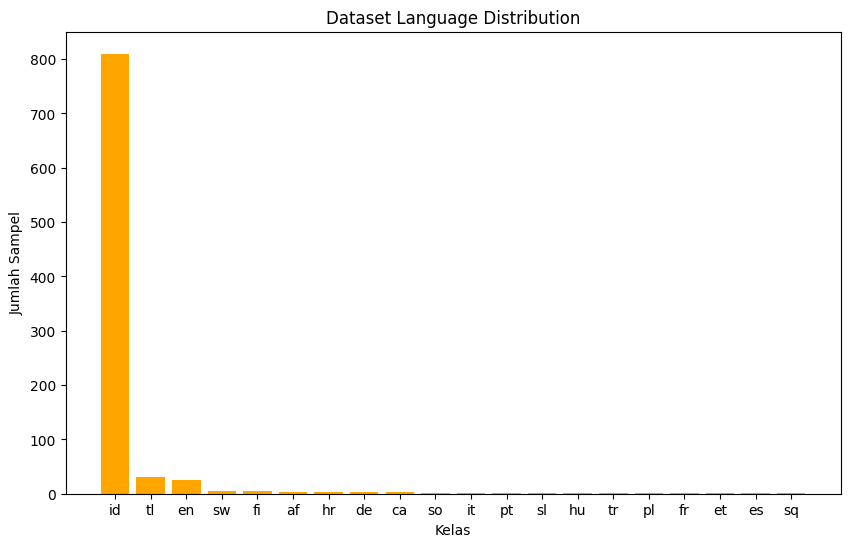

In [ ]:
import matplotlib.pyplot as plt
class_distribution = df_train['Language'].value_counts()
print("Distribusi language:")
print(class_distribution)
print(len(class_distribution))

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color='orange')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Dataset Language Distribution')
plt.xticks(class_distribution.index,)
plt.show()

In [ ]:
def replaceInaccurateLanguage(dataset=df_train):
    for index, row in dataset.iterrows():
        if row['Language'] not in ['id', 'en']:
            dataset.at[index, 'Language'] = 'id'
    return dataset

In [ ]:
df_train = replaceInaccurateLanguage()
print(df_train)

      ID                                             REVIEW  LABEL Language
0      0  The waiter is not friendly, the person wears n...      1       en
1      1  kakaknya enak bangetttt, pelayanannya cepet ta...      5       id
2      2         Pelayanan sangatt ramah, banyak promoanyaa      5       id
3      3                        Tempatnya nyaman dan bersih      5       id
4      4  Pelayanan cepat dan bagus, coba Durian Coffee ...      5       id
..   ...                                                ...    ...      ...
897  897  Jujurly.. pas masuk resto nya.. suasananya nya...      5       id
898  898  makanan enak, pelayan baik dan ramah, bagus de...      5       id
899  899  Tempat ngopi area G-Walk yang buka 24/7. Cocok...      5       id
900  900  Salah satu kopken favorit, pelayanan ramah, te...      5       id
901  901        Its fun to meet here.. its been a long time      4       en

[902 rows x 4 columns]


Distribusi language:
Language
id    876
en     26
Name: count, dtype: int64
2


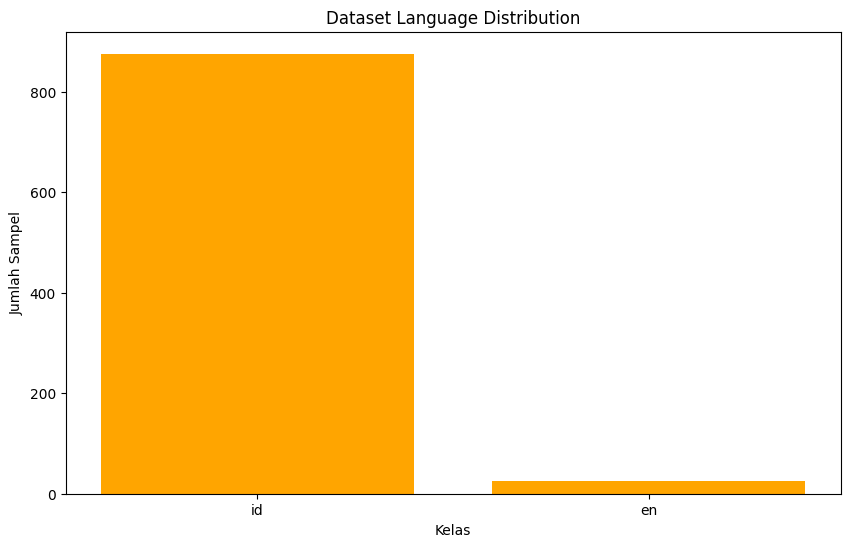

In [ ]:
import matplotlib.pyplot as plt
class_distribution = df_train['Language'].value_counts()
print("Distribusi language:")
print(class_distribution)
print(len(class_distribution))

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color='orange')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Dataset Language Distribution')
plt.xticks(class_distribution.index,)
plt.show()

In [ ]:
indonesian_records = df_train.loc[df_train['Language'] == 'id']
english_records  = df_train.loc[df_train['Language'] == 'en']

In [ ]:
!pip install textaugment --q


In [ ]:
!pip show textaugment

Name: textaugment
Version: 2.0.0
Summary: A library for augmenting text for natural language processing applications.
Home-page: https://github.com/dsfsi/textaugment
Author: Joseph Sefara
Author-email: sefaratj@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: gensim, googletrans, nltk, numpy, textblob
Required-by: 


In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.0.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==3.0.4
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.5
cufflinks==0.17.3
cupy-cuda12x==12.2.0

In [ ]:
!pip show gensim

Name: gensim
Version: 4.3.2
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy, smart-open
Required-by: textaugment


In [ ]:
!cat /usr/local/lib/python3.10/dist-packages/textaugment/translate.py

#!/usr/bin/env python
# WordNet-based data augmentation 
#
# Copyright (C) 2020
# Author: Joseph Sefara
# URL: <https://github.com/dsfsi/textaugment/>
# For license information, see LICENSE

from .constants import LANGUAGES
from textblob import TextBlob
from textblob.translate import NotTranslated
from googletrans import Translator


class Translate: 
    """
    A set of functions used to augment data.
    Supported languages are:
    Language Name	Code
    Afrikaans	af
    Albanian	sq
    Arabic	ar
    Azerbaijani	az
    Basque	eu
    Bengali	bn
    Belarusian	be
    Bulgarian	bg
    Catalan	ca
    Chinese Simplified	zh-CN
    Chinese Traditional	zh-TW
    Croatian	hr
    Czech	cs
    Danish	da
    Dutch	nl
    English	en
    Esperanto	eo
    Estonian	et
    Filipino	tl
    Finnish	fi
    French	fr
    Galician	gl
    Georgian	ka
    German	de
    Greek	el
    Gujarati	gu
    Haitian Creole	ht
    Hebrew	iw
    Hindi	hi
    Hungarian	hu
    Icelandic	is
    Indonesian	id
    Irish	ga

In [ ]:
!pip install textaugment --q
from textaugment import Translate

def indonesian_augment(dataset, columns=[2,3]):
    new_data = []
    t = Translate(src="id", to="en")

    for index, row in dataset.iterrows():
        try:
            if row['LABEL'] == columns[0] and row['Language'] == 'id':
                augmented_indonesian_review = t.augment(row['REVIEW'])
                print(f'augmented indonesian result : {augmented_indonesian_review}')
                new_data.append({
                    'ID': row.ID,
                    'REVIEW': augmented_indonesian_review,
                    'Language': 'id',
                    'LABEL': row.LABEL
                })
            elif row['LABEL'] == columns[1] and row['Language'] == 'id':
                augmented_indonesian_review = t.augment(row['REVIEW'])
                print(f'augmented indonesian result : {augmented_indonesian_review}')
                new_data.append({
                    'ID': row.ID,
                    'REVIEW': augmented_indonesian_review,
                    'Language': 'id',
                    'LABEL': row.LABEL
                })

        except Exception as e:
            print(f'Error at {e}')
            continue

    new_data = pd.DataFrame(new_data)
    dataset = pd.concat([dataset, new_data], ignore_index=True)
    return dataset


In [ ]:
df_train = indonesian_augment(df_train)
print(df_train)

augmented indonesian result : layanan lama, karena pelaruk hanyalah satu
augmented indonesian result : tempatnya sempit.
augmented indonesian result : presentasi cepat, layanan yang cukup ramah, tempat bersih
augmented indonesian result : tempatnya bagus dan bisa diinstagram, saya makan nasi dicampur dengan ayam panggang dan cumi -cumi hitam, bacem tempe/tahu. ayamnya lembut manis, cumi -cumi hitam hanya asin yang dominan dalam tekstur cumi -cumi juga agak tanah liat, tahu/tempe bacem ... sepertinya basi, kata teman saya kebanyakan asam, sausnya juga lebih tepat tamarind banyak tomat. porsi nasi cukup banyak. masih lezat dalam a. lagipula yani surabaya, janganlah mau kalah dari surabaya. tapi tempatnya wouw
augmented indonesian result : parkir: tidak memadai karena mengganggu rumah di sekitarnya untuk makanan
augmented indonesian result : hanya rasa biasa, tidak cocok. harganya cukup mahal. kamarnya tidak dingin, ac tidak menyala atau rusak. layanannya kurang ramah
augmented indonesian

Distribusi language:
Language
id    960
en     26
Name: count, dtype: int64
2


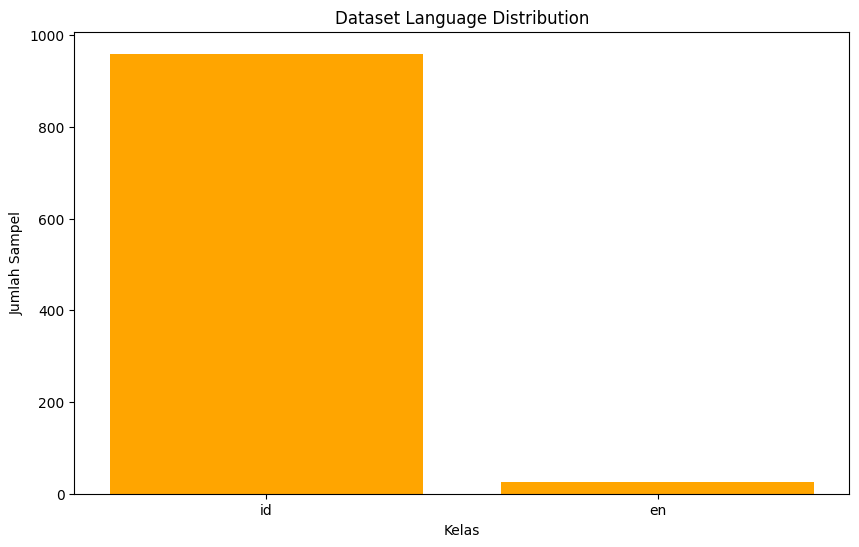

In [ ]:
import matplotlib.pyplot as plt
class_distribution = df_train['Language'].value_counts()
print("Distribusi language:")
print(class_distribution)
print(len(class_distribution))

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color='orange')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Dataset Language Distribution')
plt.xticks(class_distribution.index,)
plt.show()

In [ ]:
def augmentDataByTranslate(dataset,record,target='en'):
  result_df = pd.DataFrame()
  for indeks, row in record.iterrows():
    try:
      translated_review = GoogleTranslator(source="auto", target=target).translate(row.REVIEW)
      print(f'Translated : {translated_review}')
      row_data = {
          'ID' : row.ID + len(df_train)-1,
          'REVIEW' : translated_review,
          'Language' : target,
          'LABEL': row.LABEL
      }
      result_df = pd.concat([result_df, pd.DataFrame(row_data, index=[0])])
    except Exception as e:
      print(f'Error translating row {indeks}: {e}')
      continue

  dataset = pd.concat([dataset, result_df], ignore_index=True)
  return dataset

In [ ]:
df_train = augmentDataByTranslate(df_train,indonesian_records)
print(df_train)

Translated : The older brother is really nice, the service is quick to respond and the first one is smiling
Translated : Very friendly service, lots of promotions
Translated : The place is comfortable and clean
Translated : Fast and good service, try the new Durian Coffee which is great...
Translated : Delicious...comfortable
Translated : The service is fast, friendly, good
Translated : Service is long, chaotic, the delivery of orders from customers who order first is not as fast as those who order later. Let's be enthusiastic about improving to be better
Translated : Kopken is the best place for work assignments, the service is friendly, only the sink on the 3rd floor won't turn on. But overall everything is good
Translated : The service is friendly. Hopefully the quality of the coffee will always be stable.
Translated : There are lots of promotions
Translated : Thanks great
Translated : Super long service and the female employee is not polite and speaks rudely to buyers
Translated : 

In [ ]:
print(df_train)

        ID                                             REVIEW  LABEL Language
0        0  The waiter is not friendly, the person wears n...      1       en
1        1  kakaknya enak bangetttt, pelayanannya cepet ta...      5       id
2        2         Pelayanan sangatt ramah, banyak promoanyaa      5       id
3        3                        Tempatnya nyaman dan bersih      5       id
4        4  Pelayanan cepat dan bagus, coba Durian Coffee ...      5       id
...    ...                                                ...    ...      ...
1857  1881                       There is a place to eat here      5       en
1858  1882  Honestly... when I entered the restaurant... t...      5       en
1859  1883  the food is delicious, the waiters are kind an...      5       en
1860  1884  Coffee place in the G-Walk area which is open ...      5       en
1861  1885  One of Kopken's favorites, friendly service, s...      5       en

[1862 rows x 4 columns]


Distribusi language:
Language
id    960
en    902
Name: count, dtype: int64
2


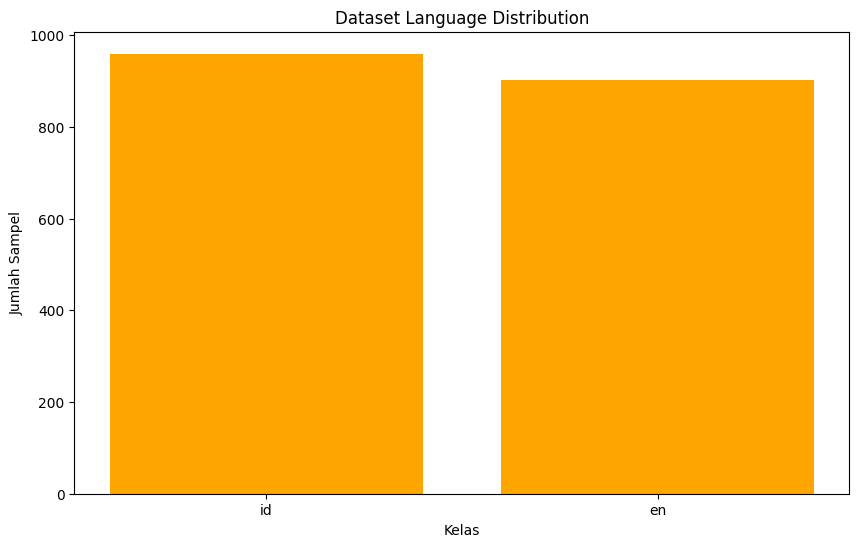

In [ ]:
import matplotlib.pyplot as plt
class_distribution = df_train['Language'].value_counts()
print("Distribusi language:")
print(class_distribution)
print(len(class_distribution))

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color='orange')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Dataset Language Distribution')
plt.xticks(class_distribution.index,)
plt.show()

**====Initiate Section=====**






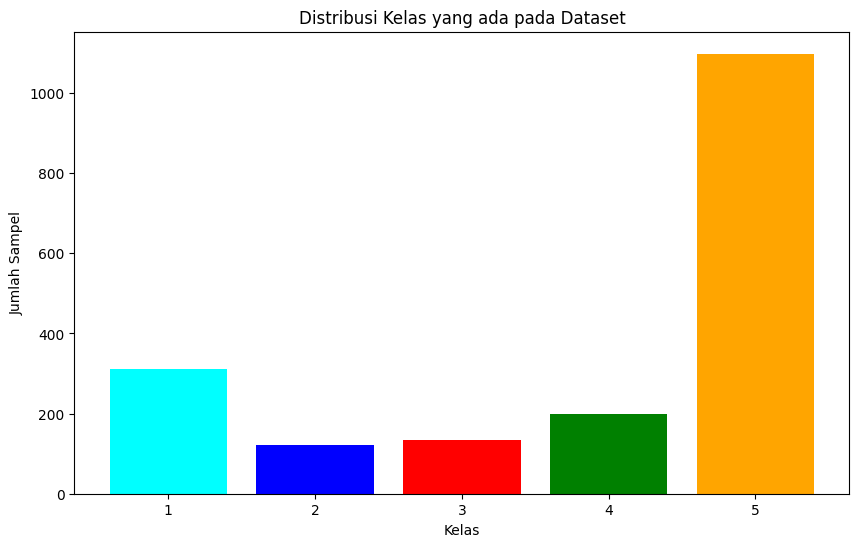

In [ ]:
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5']
values = range(1, 6)

class_distribution = df_train['LABEL'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color=['orange', 'cyan', 'green', 'red', 'blue'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas yang ada pada Dataset')
plt.xticks(values, labels)
plt.show()


In [ ]:
!pip install textattack
from textattack.augmentation import EasyDataAugmenter
import pandas as pd

def augmentedEachMinority(label_arr, class_distribution, dataset=df_train):
    majority_class_record = class_distribution.max()
    print(f"jumlah record pada label mayoritas yaitu {majority_class_record}")
    aug = EasyDataAugmenter()

    new_data = []

    for label in label_arr:
        record_count = class_distribution[label]

        row_each_label = dataset[dataset['LABEL'] == label]

        for index, row in row_each_label.iterrows():
            if record_count <= majority_class_record and row['Language'] == 'en':
                try:
                    print(f"Jumlah record count pada label {label} saat ini yaitu sebesar {record_count}")
                    augmented_review = aug.augment(row['REVIEW'])
                    print(f'augmented_result : {augmented_review}')
                    augmented_english_length = len(augmented_review)
                    for i in range(augmented_english_length):
                        new_data.append({
                            'ID': row.ID + len(dataset) - 1 + i,
                            'REVIEW': augmented_review[i],
                            'Language': 'en',
                            'LABEL': row.LABEL
                        })
                        record_count += 1

                        translated_augmented = GoogleTranslator(source="auto", target='id').translate(augmented_review[i])
                        print(f'Translated to Indonesia : {translated_augmented}')
                        translated_review = translated_augmented
                        new_data.append({
                            'ID': row.ID + len(dataset) - 1 + i,
                            'REVIEW': translated_review,
                            'Language': 'id',
                            'LABEL': row.LABEL
                        })
                        record_count += 1

                except Exception as e:
                    print(f'Error at {e}')
                    continue

    new_df = pd.DataFrame(new_data)
    dataset = pd.concat([dataset, new_df], ignore_index=True)

    return dataset


In [ ]:
df_train = augmentedEachMinority([1,2,3,4],class_distribution)

jumlah record pada label mayoritas yaitu 1098


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Jumlah record count pada label 1 saat ini yaitu sebesar 311
augmented_result : ['The waiter is not friendly, the hold person wears night guard glasses', 'The waiter is not friendly, person wears night guard glasses', 'The waiter is not friendly, the person wears night defend glasses', 'The waiter is not friendly, the person glasses night guard wears']
Translated to Indonesia : Pelayannya kurang ramah, yang jaga pakai kacamata jaga malam
Translated to Indonesia : Pelayannya kurang ramah, orangnya pakai kacamata penjaga malam
Translated to Indonesia : Pelayannya kurang ramah, orangnya pakai kacamata night defence
Translated to Indonesia : Pelayannya kurang ramah, yang jaga malamnya pakai kacamata
Jumlah record count pada label 1 saat ini yaitu sebesar 319
augmented_result : ['Waited for 30 minutes which made even angry ', 'Waited for 30 minutes which take even angry jokes', 'Waited for made minutes which 30 even angry jokes', 'Waited raging for 30 minutes which made even angry jokes']
Tr

In [ ]:
print(df_train)

        ID                                             REVIEW  LABEL Language
0        0  The waiter is not friendly, the person wears n...      1       en
1        1  kakaknya enak bangetttt, pelayanannya cepet ta...      5       id
2        2         Pelayanan sangatt ramah, banyak promoanyaa      5       id
3        3                        Tempatnya nyaman dan bersih      5       id
4        4  Pelayanan cepat dan bagus, coba Durian Coffee ...      5       id
...    ...                                                ...    ...      ...
4149  3736  Tempat yang bagus dan strategis jika menunya s...      4       id
4150  3737  A good and strategic localise if the menu is o...      4       en
4151  3737  Lokalisasi yang baik dan strategis jika menuny...      4       id
4152  3738  A and strategic place if the menu is of an exc...      4       en
4153  3738  Tempat yang dan strategis jika menunya standar...      4       id

[4154 rows x 4 columns]


In [ ]:
print(len(df_train))

4154


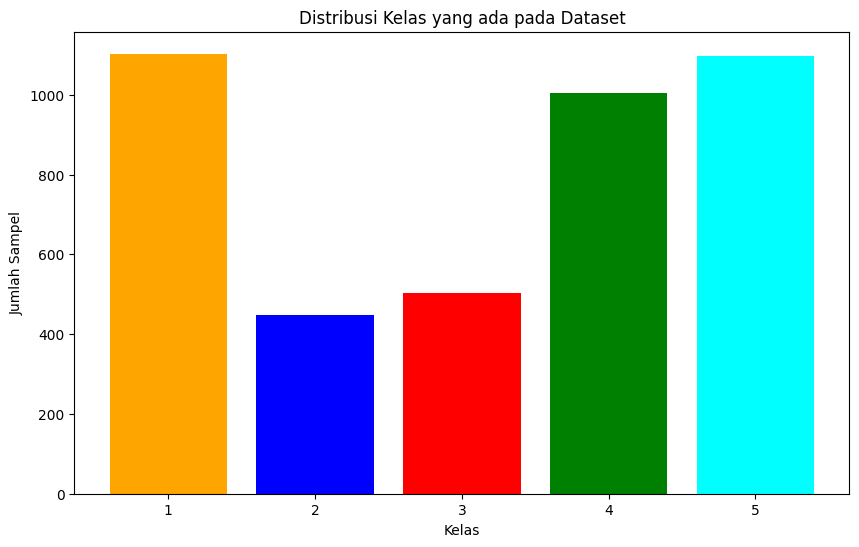

In [ ]:
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5']
values = range(1, 6)

class_distribution = df_train['LABEL'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color=['orange', 'cyan', 'green', 'red', 'blue'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas yang ada pada Dataset')
plt.xticks(values, labels)
plt.show()


In [ ]:
from nltk.stem import WordNetLemmatizer
from nlp_id.lemmatizer import Lemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def normalize_text(input_df):
    result = []
    for index, row in input_df.iterrows():
        input_text = row.REVIEW
        lang = row.Language
        stopwords_lang = 'english' if lang == 'en' else 'indonesian'
        lowercase = tf.strings.lower(input_text)
        stripped_string = tf.strings.regex_replace(lowercase,
                                               '[%s]' % re.escape(string.punctuation),
                                               '')
        stripped_string_list = stripped_string.numpy()
        words = stripped_string_list.split()

        lemmatizer = WordNetLemmatizer() if lang == 'en' else Lemmatizer()

        normalized_text = " ".join([lemmatizer.lemmatize(word.decode('utf-8')) for word in words])
        normalized_text = re.sub(r'(.)\1{2,}', r'\1', normalized_text)
        tokenized_words = word_tokenize(normalized_text)

        stop_words = stopwords.words(stopwords_lang)
        tokenized_words =  [word for word in tokenized_words if not word.lower() in stop_words and len(word) > 1]

        sentence = " ".join(tokenized_words)
        result.append(sentence)

    return result

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_train[['LABEL']]).toarray())

df_train = df_train.join(enc_df)

df_train

,ID,REVIEW,LABEL,Language,0,1,2,3,4
0,0,"The waiter is not friendly, the person wears n...",1,en,1.0,0.0,0.0,0.0,0.0
1,1,"kakaknya enak bangetttt, pelayanannya cepet ta...",5,id,0.0,0.0,0.0,0.0,1.0
2,2,"Pelayanan sangatt ramah, banyak promoanyaa",5,id,0.0,0.0,0.0,0.0,1.0
3,3,Tempatnya nyaman dan bersih,5,id,0.0,0.0,0.0,0.0,1.0
4,4,"Pelayanan cepat dan bagus, coba Durian Coffee ...",5,id,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4149,3736,Tempat yang bagus dan strategis jika menunya s...,4,id,0.0,0.0,0.0,1.0,0.0
4150,3737,A good and strategic localise if the menu is o...,4,en,0.0,0.0,0.0,1.0,0.0
4151,3737,Lokalisasi yang baik dan strategis jika menuny...,4,id,0.0,0.0,0.0,1.0,0.0
4152,3738,A and strategic place if the menu is of an exc...,4,en,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_train['REVIEW'] = normalize_text(df_train)
print()
print("RESULTTT ============")
print(df_train.head())


RESULTTT ============
   ID                                             REVIEW  LABEL Language    0  \
0   0      waiter friendly person wear night guard glass      1       en  1.0   
1   1  kakak enak banget layan cepet tanggap murah se...      5       id  0.0   
2   2                     layan sangatt ramah promoanyaa      5       id  0.0   
3   3                                      nyaman bersih      5       id  0.0   
4   4       layan cepat bagus coba durian coffee mantapp      5       id  0.0   

     1    2    3    4  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  1.0  


In [ ]:
import pandas as pd

if df_train['REVIEW'].isnull().any():
    df_train.dropna(subset=['REVIEW'], inplace=True)

In [ ]:
sentiment = df_train['REVIEW'].values
label = df_train[[0,1,2,3,4]].values

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in str(i).split():
            words.append(j.strip())
    return words

corpus = get_corpus(df_train.REVIEW)
corpus

['waiter',
 'friendly',
 'person',
 'wear',
 'night',
 'guard',
 'glass',
 'kakak',
 'enak',
 'banget',
 'layan',
 'cepet',
 'tanggap',
 'murah',
 'senyum',
 'layan',
 'sangatt',
 'ramah',
 'promoanyaa',
 'nyaman',
 'bersih',
 'layan',
 'cepat',
 'bagus',
 'coba',
 'durian',
 'coffee',
 'mantapp',
 'enaknyaman',
 'pelayananya',
 'cepat',
 'ramah',
 'layan',
 'semrawut',
 'sani',
 'pesan',
 'customer',
 'yg',
 'order',
 'kalah',
 'cepat',
 'yg',
 'order',
 'ayo',
 'semangat',
 'benah',
 'kopken',
 'ngagel',
 'the',
 'best',
 'nugas',
 'layan',
 'nya',
 'ramah',
 'wastafel',
 'lantai',
 'ga',
 'nyala',
 'but',
 'overall',
 'baguss',
 'layan',
 'ramah',
 'mudah2an',
 'mutu',
 'stabil',
 'kopi',
 'promonya',
 'banget',
 'makas',
 'mantap',
 'layan',
 'super',
 'pegawai',
 'wanita',
 'nya',
 'sopan',
 'bicara',
 'kasar',
 'beli',
 'soto',
 'lamongan',
 'jl',
 'anti',
 'wiyung',
 'enak',
 'nongkrong',
 'kerja',
 'tugas',
 'luas',
 'bersih',
 'ramai',
 'meja',
 'colok',
 'request',
 'cable',


In [ ]:
from collections import Counter
counter = Counter(corpus)
counter

Counter({'waiter': 62,
         'friendly': 360,
         'person': 54,
         'wear': 11,
         'night': 26,
         'guard': 19,
         'glass': 36,
         'kakak': 3,
         'enak': 418,
         'banget': 258,
         'layan': 695,
         'cepet': 14,
         'tanggap': 19,
         'murah': 37,
         'senyum': 19,
         'sangatt': 1,
         'ramah': 382,
         'promoanyaa': 1,
         'nyaman': 272,
         'bersih': 155,
         'cepat': 145,
         'bagus': 111,
         'coba': 49,
         'durian': 2,
         'coffee': 343,
         'mantapp': 4,
         'enaknyaman': 1,
         'pelayananya': 3,
         'semrawut': 4,
         'sani': 1,
         'pesan': 307,
         'customer': 149,
         'yg': 211,
         'order': 323,
         'kalah': 8,
         'ayo': 5,
         'semangat': 6,
         'benah': 2,
         'kopken': 85,
         'ngagel': 3,
         'the': 32,
         'best': 40,
         'nugas': 8,
         'nya': 226,
  

In [ ]:
from sklearn.model_selection import train_test_split
trained_sentiment, tested_sentiment, trained_label, tested_label = train_test_split(df_train.REVIEW,label,test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(trained_sentiment)

trained_sequences = tokenizer.texts_to_sequences(trained_sentiment)
tested_sequences = tokenizer.texts_to_sequences(tested_sentiment)

trained_padded = pad_sequences(trained_sequences,padding='post',
maxlen=50,
truncating='post')
tested_padded = pad_sequences(tested_sequences,padding='post',
maxlen=50,
truncating='post')

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 64)            320000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 50, 256)           197632    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 50, 256)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dropout_7 (Dropout)         (None, 128)              

In [ ]:
class custom_Callback_class(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.85) :
      print("\nProses Training Dihentikan karena Akurasi telah melampaui 95% dan validation accuracy telah melampaui 85%")
      self.model.stop_training = True

In [ ]:
custom_Callback = custom_Callback_class()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
def count_class_weights(class_series):

  class_labels = np.unique(class_series)
  class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
  return dict(zip(class_labels, class_weights))

In [ ]:
class_weights = count_class_weights([0, 1, 2, 3, 4])

In [ ]:
num_epochs = 30
history_model = model.fit(trained_padded, trained_label, epochs=num_epochs,
                    validation_data=(tested_padded, tested_label), verbose=2, callbacks = [custom_Callback],class_weight=class_weights)

Epoch 1/30
104/104 - 43s - loss: 1.9756 - accuracy: 0.4568 - val_loss: 1.9768 - val_accuracy: 0.4910 - 43s/epoch - 415ms/step
Epoch 2/30
104/104 - 31s - loss: 0.9604 - accuracy: 0.8032 - val_loss: 1.4590 - val_accuracy: 0.7978 - 31s/epoch - 294ms/step
Epoch 3/30
104/104 - 31s - loss: 0.5284 - accuracy: 0.9127 - val_loss: 0.9294 - val_accuracy: 0.8375 - 31s/epoch - 300ms/step
Epoch 4/30
104/104 - 31s - loss: 0.3493 - accuracy: 0.9353 - val_loss: 0.6182 - val_accuracy: 0.8400 - 31s/epoch - 302ms/step
Epoch 5/30
104/104 - 31s - loss: 0.2800 - accuracy: 0.9410 - val_loss: 0.5215 - val_accuracy: 0.8448 - 31s/epoch - 301ms/step
Epoch 6/30
104/104 - 32s - loss: 0.2027 - accuracy: 0.9552 - val_loss: 0.5501 - val_accuracy: 0.8412 - 32s/epoch - 307ms/step
Epoch 7/30

Proses Training Dihentikan karena Akurasi telah melampaui 95% dan validation accuracy telah melampaui 85%
104/104 - 32s - loss: 0.1759 - accuracy: 0.9588 - val_loss: 0.4439 - val_accuracy: 0.8761 - 32s/epoch - 304ms/step


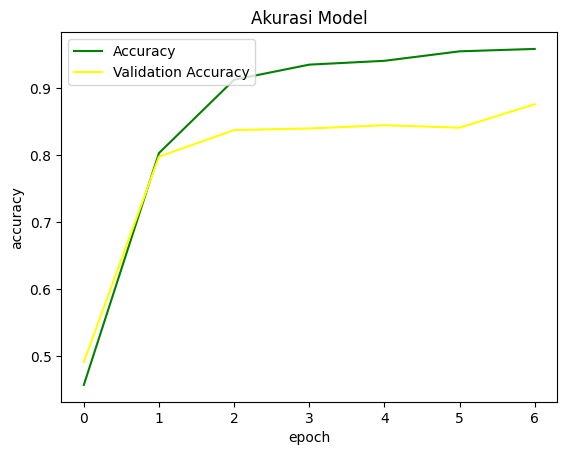

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_model.history['accuracy'], color='green', label='Train Accuracy')
plt.plot(history_model.history['val_accuracy'], color='yellow', label='Validation Accuracy')
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

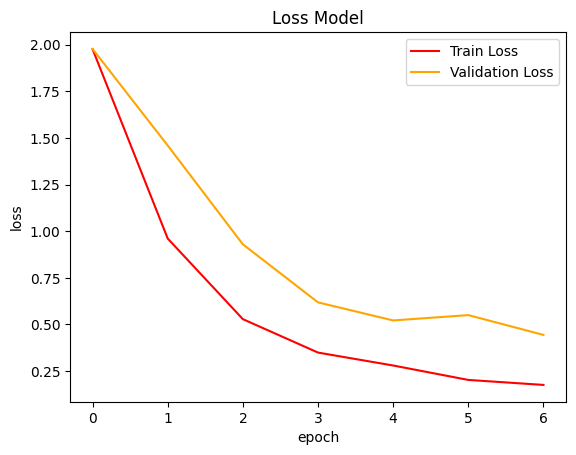

In [ ]:
plt.plot(history_model.history['loss'], color='red', label='Train Loss')
plt.plot(history_model.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

Reading Test Set

In [ ]:
df_test =pd.read_csv(f'{base_dir}/test.tsv',sep = "\t")

In [ ]:
df_test["Language"] = df_test['REVIEW'].apply(detect_lang)

In [ ]:
def normalize_test_text(input_df):
    result = []
    for index, row in input_df.iterrows():
        input_text = row.REVIEW
        lang = row.Language
        stopwords_lang = 'english' if lang == 'en' else 'indonesian'
        lowercase = tf.strings.lower(input_text)
        stripped_string = tf.strings.regex_replace(lowercase,
                                               '[%s]' % re.escape(string.punctuation),
                                               '')
        stripped_string_list = stripped_string.numpy()
        words = stripped_string_list.split()

        lemmatizer = WordNetLemmatizer() if lang == 'en' else Lemmatizer()

        normalized_text = " ".join([lemmatizer.lemmatize(word.decode('utf-8')) for word in words])
        normalized_text = re.sub(r'(.)\1{2,}', r'\1', normalized_text)
        tokenized_words = word_tokenize(normalized_text)

        stop_words = stopwords.words(stopwords_lang)
        tokenized_words =  [word for word in tokenized_words if not word.lower() in stop_words]

        sentence = " ".join(tokenized_words)
        result.append(sentence)

    return result

In [ ]:
df_test['REVIEW'] = normalize_test_text(df_test)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(df_test.REVIEW)

tested_sequences = tokenizer.texts_to_sequences(df_test.REVIEW)

tested_padded = pad_sequences(tested_sequences,padding='post',
maxlen=50,
truncating='post')

In [ ]:
predictions = []
for sample in tested_padded:
    prediction = model.predict(np.expand_dims(sample, axis=0))
    prediction = np.argmax(prediction) + 1
    predictions.append(prediction)
df_test["LABEL"] = predictions

1/1 [==============================] - 0s 47ms/step


In [ ]:
df_test = df_test.drop(['REVIEW','Language'], axis=1)

In [ ]:
from google.colab import files
df_test.to_csv('submission.csv', index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>